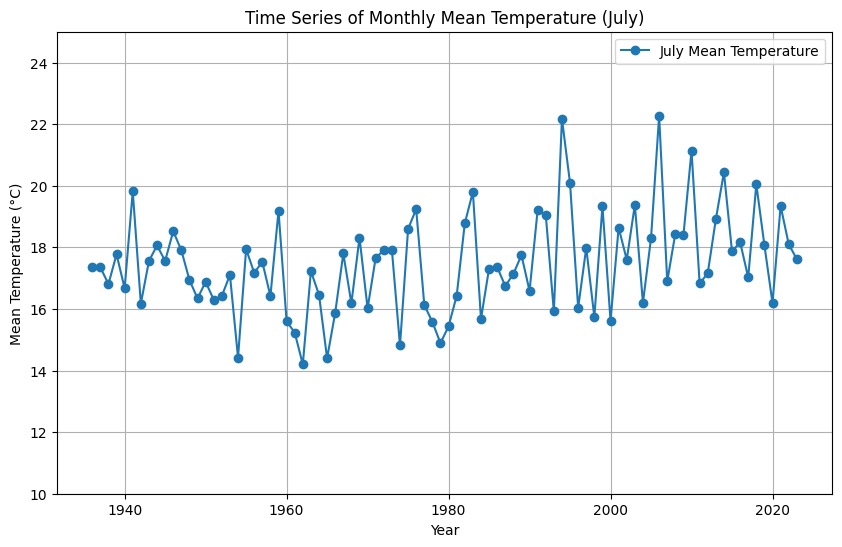

Mean: 17.47 °C
Variance: 2.60 °C
Skewness: 0.53 °C



In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Part a: Read the data and process it
file_path = "./../data//interim//klima_hamburg_TMK_TXK_TNK.csv"
data = pd.read_csv(file_path, delimiter=";")

data["DD"] = data["DD"].astype(int)
data["MM"] = data["MM"].astype(int)
data["YYYY"] = data["YYYY"].astype(int)

data["DATE"] = pd.to_datetime(
    {"year": data["YYYY"], "month": data["MM"], "day": data["DD"]}
)
data.set_index("DATE", inplace=True)

# Choose a month (e.g., July) and calculate monthly mean values
chosen_month = 7
monthly_mean = data[data["MM"] == chosen_month].groupby(data["YYYY"])["TMK"].mean()

# Plot the time series of monthly mean values
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_mean.index, monthly_mean.values, marker="o", label="July Mean Temperature"
)
plt.title("Time Series of Monthly Mean Temperature (July)")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.ylim(10, 25)  # Set y-axis limits between 10 and 25°C
plt.grid()
plt.legend()
plt.show()

# Calculate the first three statistical moments
mean = monthly_mean.mean()
variance = monthly_mean.var()
skewness = monthly_mean.skew()

print(f"Mean: {mean:.2f} °C")
print(f"Variance: {variance:.2f} °C")
print(f"Skewness: {skewness:.2f} °C\n")

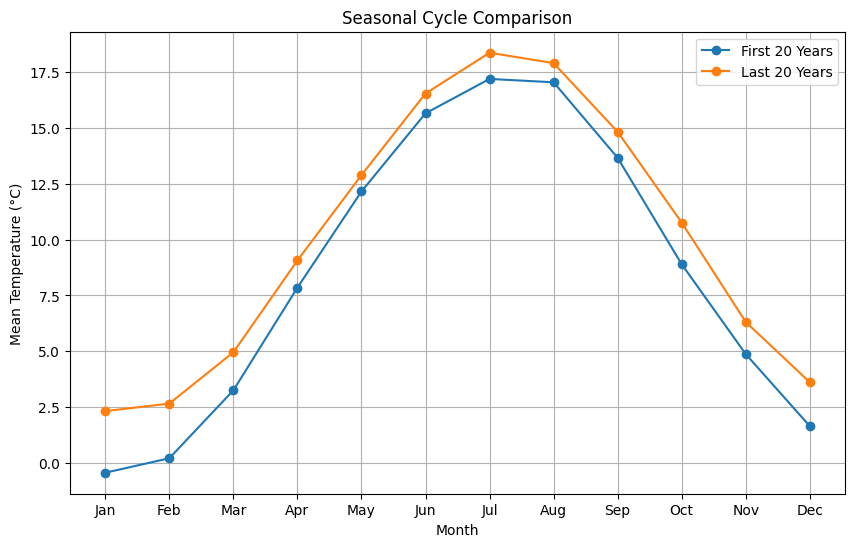

In [5]:
# Part b: Seasonal cycle over the first and last 20 years
first_20_years = data[data["YYYY"] <= data["YYYY"].min() + 19]
last_20_years = data[data["YYYY"] >= data["YYYY"].max() - 19]

# Group by month and calculate mean for each month
seasonal_cycle_first = first_20_years.groupby("MM")["TMK"].mean()
seasonal_cycle_last = last_20_years.groupby("MM")["TMK"].mean()

diff_cycle = seasonal_cycle_last - seasonal_cycle_first

# Calculate standard deviation for the first 20 years
#std_dev_first = first_20_years.groupby("MM")["TMK"].std()

# Calculate confidence intervals for the first 20 years
#ci_first_lower = seasonal_cycle_first - 1.96 * (std_dev_first / np.sqrt(len(first_20_years)))
#ci_first_upper = seasonal_cycle_first + 1.96 * (std_dev_first / np.sqrt(len(first_20_years)))

# Plot the seasonal cycles
plt.figure(figsize=(10, 6))
# Plot confidence intervals
#plt.fill_between(
#    seasonal_cycle_first.index,
#    ci_first_lower,
#    ci_first_upper,
#    color="blue",
#    alpha=0.2,
#    label="95% CI (First 20 Years)",
#)
plt.plot(
    seasonal_cycle_first.index,
    seasonal_cycle_first.values,
    marker="o",
    label="First 20 Years",
)
plt.plot(
    seasonal_cycle_last.index,
    seasonal_cycle_last.values,
    marker="o",
    label="Last 20 Years",
)
plt.title("Seasonal Cycle Comparison")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(
    ticks=range(1, 13),
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.grid()
plt.legend()
plt.show()

In [6]:
# Part c: Compare seasonal cycle changes to standard deviation
std_dev = monthly_mean.std()
print(f"Standard Deviation of Monthly Mean Temperature (July): {std_dev:.2f} °C")

Standard Deviation of Monthly Mean Temperature (July): 1.61 °C


### How is the Seasonal Cycle Changing?

The seasonal cycle shows noticeable differences when comparing the first 20 years (`seasonal_cycle_first`) to the last 20 years (`seasonal_cycle_last`). 

- **Temperature Increase**: Across most months, the mean temperature in the last 20 years is higher than in the first 20 years, indicating a warming trend.
- **Peak Shift**: The peak summer temperatures (July and August) have increased, and the winter months (January and February) also show a significant rise in mean temperatures.

### Comparison to Standard Deviation/Variance

From part a), the **standard deviation** of the monthly mean temperature for July is `1.61 °C`, and the **variance** is `2.60 °C²`. 

- The observed changes in the seasonal cycle exceed the standard deviation for several months, particularly in **January**, **February**, **March**, **October** and **December**, suggesting that the changes are statistically significant and not due to random variability.

- Below is a table showing the differences in the seasonal cycle (`diff_seasonal_cycle`) for each month, where red temperature differences show discrepancy larger than the standard deviation:

| Month       | Difference (°C)                     |
|-------------|-------------------------------------|
| January     | <font color="red">2.76</font>      |
| February    | <font color="red">2.45</font>      |
| March       | <font color="red">1.71</font>      |
| April       | 1.22                                |
| May         | 0.73                                |
| June        | 0.89                                |
| July        | 1.17                                |
| August      | 0.86                                |
| September   | 1.16                                |
| October     | <font color="red">1.86</font>      |
| November    | 1.44                                |
| December    | <font color="red">1.96</font>      |
- For example, the difference in July's mean temperature between the first and last 20 years is approximately `1.17 °C`, which is comparable to the standard deviation, indicating a meaningful shift in the seasonal cycle.